In [2]:
!pip install pandas numpy scikit-learn matplotlib

2227.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
df = pd.read_csv('./homeprices.csv')
df

,sqft,price,availability,area_type
0,2600,550000.0,19-Dec,Super built-up Area
1,3000,565000.0,Ready To Move,Plot Area
2,3200,610000.0,Ready To Move,Built-up Area
3,3600,NaN,Ready To Move,Super built-up Area
4,4000,725000.0,Ready To Move,Super built-up Area
5,4184,799000.0,Ready To Move,Super built-up Area
6,4631,894000.0,18-May,Super built-up Area
7,4783,923000.0,Ready To Move,Super built-up Area
8,5115,984000.0,Ready To Move,Super built-up Area
9,5584,1060000.0,22-Nov,Plot Area


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft          10 non-null     int64  
 1   price         9 non-null      float64
 2   availability  10 non-null     object 
 3   area_type     10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [6]:
df.isnull()

,sqft,price,availability,area_type
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
df.head()

,sqft,price,availability,area_type
0,2600,550000.0,19-Dec,Super built-up Area
1,3000,565000.0,Ready To Move,Plot Area
2,3200,610000.0,Ready To Move,Built-up Area
3,3600,NaN,Ready To Move,Super built-up Area
4,4000,725000.0,Ready To Move,Super built-up Area


In [8]:
df.tail()

,sqft,price,availability,area_type
5,4184,799000.0,Ready To Move,Super built-up Area
6,4631,894000.0,18-May,Super built-up Area
7,4783,923000.0,Ready To Move,Super built-up Area
8,5115,984000.0,Ready To Move,Super built-up Area
9,5584,1060000.0,22-Nov,Plot Area


In [9]:
df = df.drop(columns=['availability','area_type'])
df

,sqft,price
0,2600,550000.0
1,3000,565000.0
2,3200,610000.0
3,3600,NaN
4,4000,725000.0
5,4184,799000.0
6,4631,894000.0
7,4783,923000.0
8,5115,984000.0
9,5584,1060000.0


In [10]:
df['price']=df['price'].fillna(df['price'].median())
df

,sqft,price
0,2600,550000.0
1,3000,565000.0
2,3200,610000.0
3,3600,799000.0
4,4000,725000.0
5,4184,799000.0
6,4631,894000.0
7,4783,923000.0
8,5115,984000.0
9,5584,1060000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sqft    10 non-null     int64  
 1   price   10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [12]:
X = df[['sqft' ]]
Y = df ['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

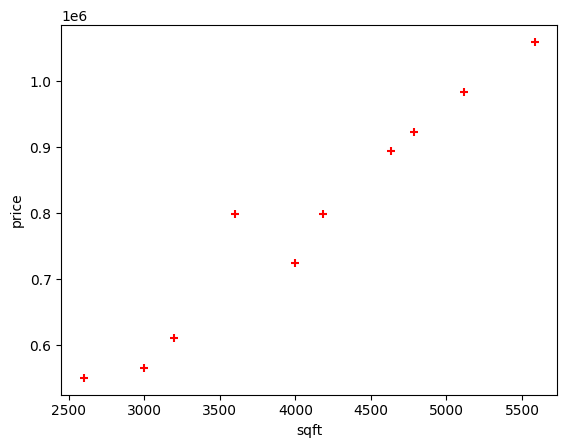

In [18]:
%matplotlib inline
plt.xlabel('sqft') # X axis
plt.ylabel('price') # Y axis
plt.scatter(df.sqft, df.price, color='red', marker='+')
plt. show()

In [19]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Slope: [171.0171439]
Intercept: 98489.92716868629


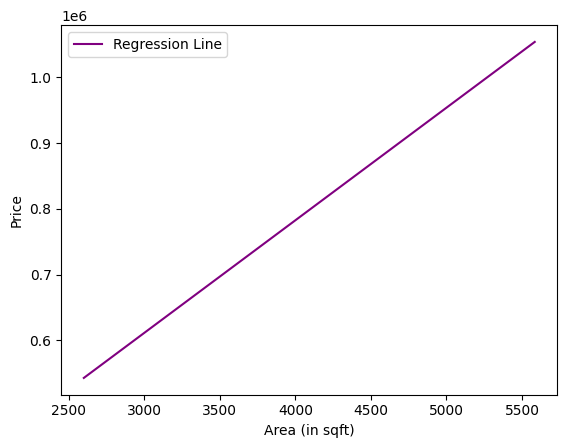

In [20]:
slope = model.coef_
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

# Regression line
plt.xlabel('Area (in sqft)') # X axis
plt.ylabel('Price') # Y axis
plt.plot(df.sqft, slope * df.sqft + intercept, color='purple', label='Regression Line')
plt.legend()
plt.show()

In [21]:
Y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse :.2f}")

Mean Squared Error: 1140909674.34


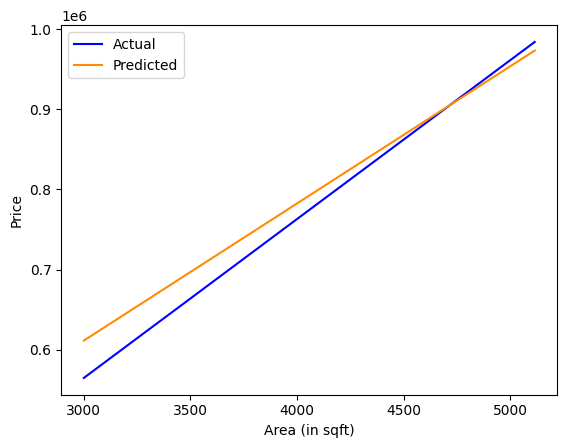

In [24]:
# Plot the predictions against the actual values to assess the model's performance visually
plt.plot(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='darkorange', label='Predicted')
plt.xlabel('Area (in sqft)')
plt.ylabel('Price')
plt.legend()
plt. show()

In [25]:
model.predict([[3300]])

/home/flickshot/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([662846.50204889])

In [26]:
model.predict([[4500]])

/home/flickshot/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([868067.0747326])

In [27]:
model.predict([[5000]])

/home/flickshot/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([953575.64668414])

In [28]:
model.predict([[2300]])

/home/flickshot/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([491829.3581458])

In [29]:
model.predict([[3200]])

/home/flickshot/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([645744.78765858])